# Import Libraries

In [1]:
import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math
import scipy.stats as stats

# Machine learning process
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# features analysis libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.decomposition import PCA

import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings('ignore')


# Data Gathering, Data Cleaning, and Preparation

In [2]:
#  membaca dataset
df = pd.read_csv('bank-additional-full.csv')

# menampilkan dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# bentuk data
df.shape

(41188, 21)

In [4]:
# nama kolom pada dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
# memeriksa nilai null pada dataset
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# menampilkan informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# mengelompokkan kolom berdasarkan tipe data int dan float
num_cols = list(df.select_dtypes(include=['int64']).columns.values) + list(df.select_dtypes(include=['float64']).columns.values)

In [8]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [9]:
# memeriksa kolom dengan value 'unknown'
df[(df[num_cols] == 'unknown')].count()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
# mengelompokkan kolom berdasarkan tipe data object
category_cols = list(df.select_dtypes(include=['object']).columns.values)
category_cols 

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [11]:
# memeriksa kolom dengan value 'unknown'
df[(df[category_cols] == 'unknown')].count()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [12]:
# df.loc[(df['job']== 'unknown')] = np.nan
# df.loc[(df['marital']== 'unknown')] = np.nan
# df.loc[(df['education']== 'unknown')] = np.nan
# df.loc[(df['default']== 'unknown')] = np.nan
# df.loc[(df['housing']== 'unknown')] = np.nan
# df.loc[(df['loan']== 'unknown')] = np.nan
# df.loc[(df['contact']== 'unknown')] = np.nan
# df.loc[(df['month']== 'unknown')] = np.nan
# df.loc[(df['day_of_week']== 'unknown')] = np.nan
# df.loc[(df['poutcome']== 'unknown')] = np.nan

In [13]:
df[(df[category_cols] == 'unknown')].count()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [14]:
# menampilkan datset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
# menampilkan deskriptif statistik dari hasil perhitungan num_cols
df[num_cols].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
# menghitung value pada kolom 'y'
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [17]:
# membuuat variabel baru dari value atribut y 
y_no = df[df['y'] == 'no']
y_yes= df[df['y'] == 'yes']

<AxesSubplot:xlabel='y', ylabel='count'>

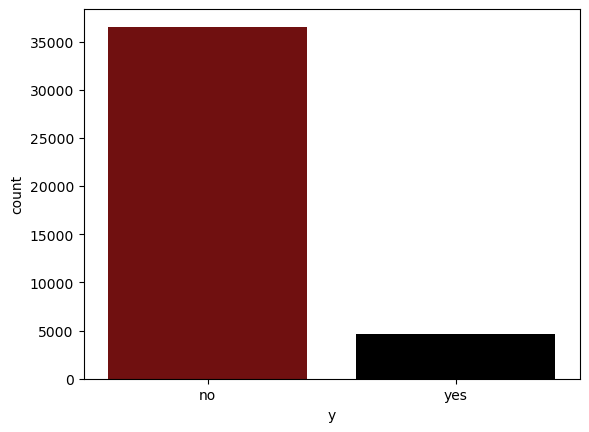

In [18]:
# menampilkan plot untuk atribut y berdasarkan valuenya
sns.countplot(data=df, x='y', palette=['#800000', '#000000'])


Dari kolom Y dapat disimpulkan bahwa 
- Jumlah clients yang telah berlangganan Term Deposit adalah sebanyak 36548
- Jumlah clients yang tidak berlangganan Term Deposit adalah sebanyak 4640

In [19]:
# menampilkan variabel unique setiap kolom
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [20]:
# menghitung value dari kolom 'job'
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [21]:
# menghitung value dari kolom 'marital'
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [22]:
# menghitung value dari kolom 'education'
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [23]:
# menghitung value dari kolom 'contact'
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

## Subplots untuk kolom Marital, Contact, Job, dan Education
Membuat subplots untuk beberapa kolom pada dataset dengan mengemlompokkan berdasarkan value kolom y

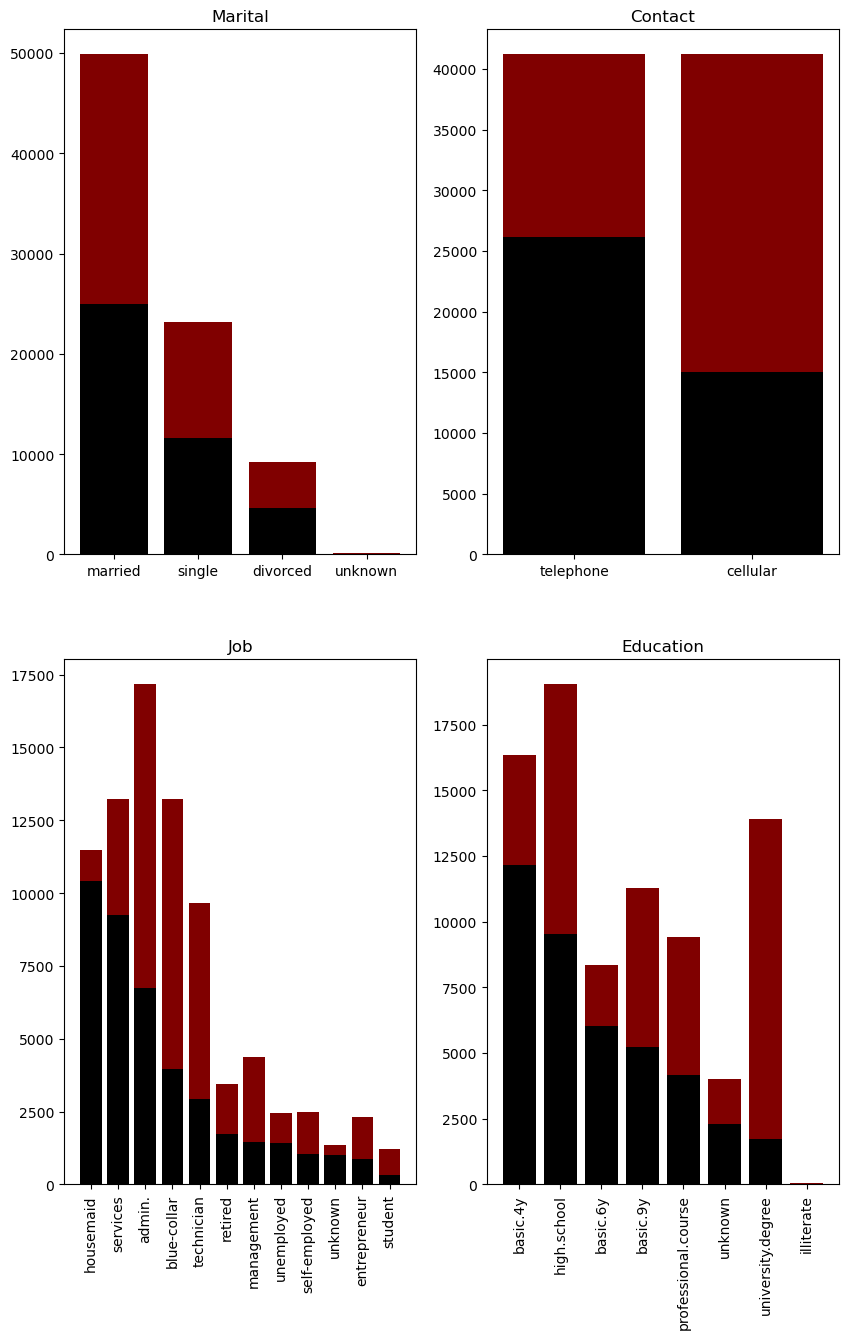

In [24]:
fig, ax = plt.subplots(2,2, figsize=(10,15))

# data yes
ax[0, 0].bar(df['marital'].unique(), 
             height = df['marital'].value_counts(),
             color='#000000')
# data no
ax[0, 0].bar(df['marital'].unique(),
             height = df['marital'].value_counts()[df['marital'].unique()],
             bottom = df['marital'].value_counts(),
             color = '#800000') 

# data yes
ax[0, 1].bar(df['contact'].unique(), 
             height = df['contact'].value_counts(),
             color='#000000')
# data no
ax[0, 1].bar(df['contact'].unique(),
             height = df['contact'].value_counts()[df['contact'].unique()],
             bottom = df['contact'].value_counts(),
             color = '#800000') 


# data yes
ax[1, 0].bar(df['job'].unique(), 
             height = df['job'].value_counts(),
             color='#000000')
# data no
ax[1, 0].bar(df['job'].unique(),
             height = df['job'].value_counts()[df['job'].unique()],
             bottom = df['job'].value_counts(),
             color = '#800000') 

# data yes
ax[1, 1].bar(df['education'].unique(), 
             height = df['education'].value_counts(),
             color='#000000')
# data no
ax[1, 1].bar(df['education'].unique(),
             height = df['education'].value_counts()[df['education'].unique()],
             bottom = df['education'].value_counts(),
             color = '#800000') 


ax[0,0].title.set_text('Marital')
ax[0,0].tick_params(axis='x')

ax[0,1].title.set_text('Contact')
ax[0,1].tick_params(axis='x')

ax[1, 0].title.set_text('Job')
ax[1, 0].tick_params(axis='x', rotation=90)

ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x', rotation=90)

# yg bawah data yes
# yg atas data no
# admin 'yes' : 0 - 5000
# admin 'no' : >7500 - <17500

In [25]:
# menampilkan nilai unique pada setiap kolom di num_cols
# for  cols in num_cols:
#     print('_'*80)
#     print('column',cols.upper(), ':')
#     print(df[cols].unique())
#     print('_'*80)

In [26]:
# menampilkan nilai unique pada setiap kolom di category_cols
# for  cols in category_cols:
#     print('_'*80)
#     print('column',cols.upper(), ':')
#     print(df[cols].unique())
#     print('_'*80)

In [27]:
df[category_cols].columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

## Subplots untuk kolom Housing, Loan, Default, Poutcome, Day_of_week, dan Month
Membuat subplots untuk beberapa kolom pada dataset dengan mengemlompokkan berdasarkan value kolom y

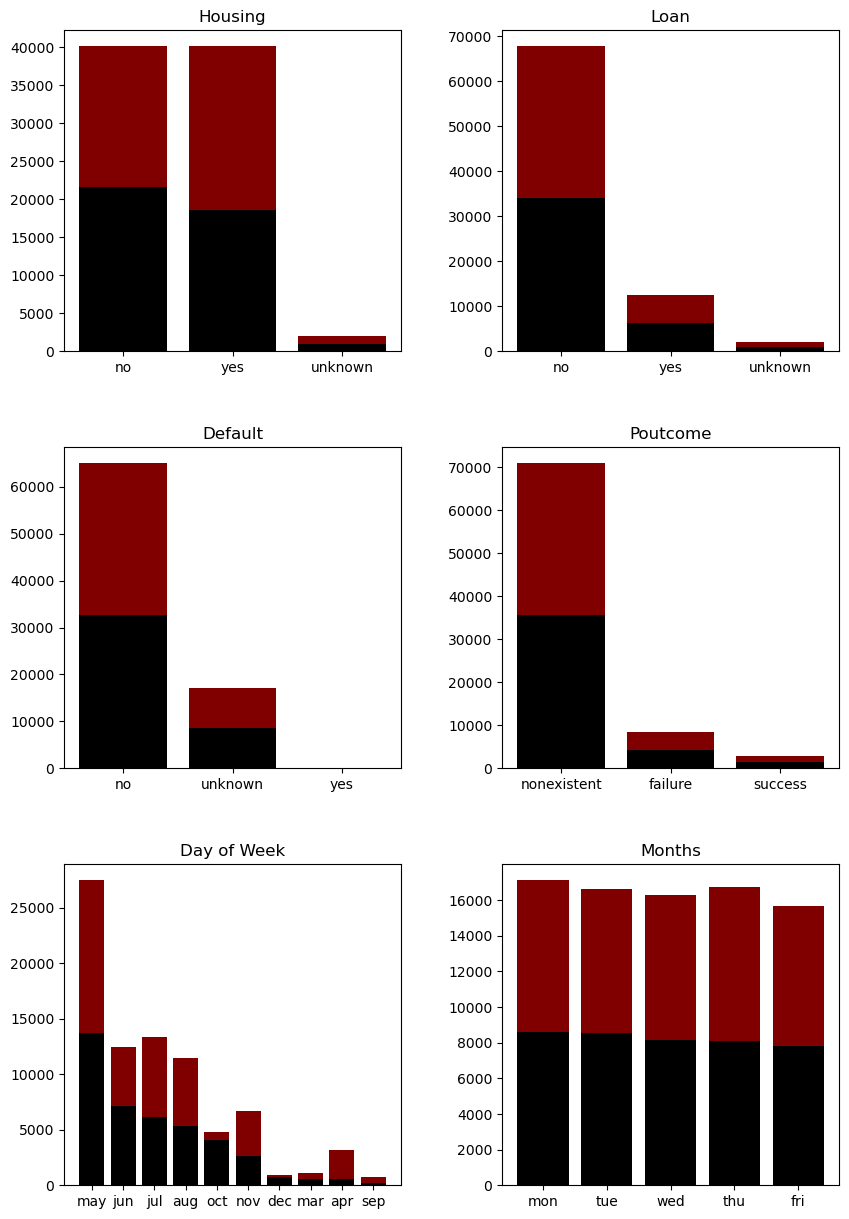

In [28]:
fig, ax = plt.subplots(3,2, figsize=(10,15))

ax[0,0].bar(df['housing'].unique(),
            height=df['housing'].value_counts(),
            color='#000000'
           )
ax[0,0].bar(df['housing'].unique(),
            height=df['housing'].value_counts()[df['housing'].unique()],
            bottom=df['housing'].value_counts(),
            color='#800000'
           )


ax[0,1].bar(df['loan'].unique(),
            height=df['loan'].value_counts(),
            color='#000000'
           )
ax[0,1].bar(df['loan'].unique(),
            height=df['loan'].value_counts()[df['loan'].unique()],
            bottom=df['loan'].value_counts(),
            color='#800000'
           )


ax[1,0].bar(df['default'].unique(),
            height=df['default'].value_counts(),
            color='#000000'
           )
ax[1,0].bar(df['default'].unique(),
            height=df['default'].value_counts()[df['default'].unique()],
            bottom=df['default'].value_counts(),
            color='#800000'
           )

ax[1,1].bar(df['poutcome'].unique(),
            height=df['poutcome'].value_counts(),
            color='#000000'
           )
ax[1,1].bar(df['poutcome'].unique(),
            height=df['poutcome'].value_counts()[df['poutcome'].unique()],
            bottom=df['poutcome'].value_counts(),
            color='#800000'
           )

ax[2,0].bar(df['month'].unique(),
            height=df['month'].value_counts(),
            color='#000000'
           )
ax[2,0].bar(df['month'].unique(),
            height=df['month'].value_counts()[df['month'].unique()],
            bottom=df['month'].value_counts(),
            color='#800000'
           )

ax[2,1].bar(df['day_of_week'].unique(),
            height=df['day_of_week'].value_counts(),
            color='#000000'
           )
ax[2,1].bar(df['day_of_week'].unique(),
            height=df['day_of_week'].value_counts()[df['day_of_week'].unique()],
            bottom=df['day_of_week'].value_counts(),
            color='#800000'
           )


ax[0,0].title.set_text('Housing')
ax[0,0].tick_params(axis='x')

ax[0,1].title.set_text('Loan')
ax[0,1].tick_params(axis='x')

ax[1,0].title.set_text('Default')
ax[1,0].tick_params(axis='x')

ax[1,1].title.set_text('Poutcome')
ax[1,1].tick_params(axis='x')

ax[2,0].title.set_text('Day of Week')
ax[2,0].tick_params(axis='x')

ax[2,1].title.set_text('Months')
ax[2,1].tick_params(axis='x')


plt.subplots_adjust( wspace=0.3, hspace=0.3)

- LabelEncoder adalah salah satu kelas dalam library Scikit-learn pada bahasa pemrograman Python yang digunakan untuk melakukan transformasi data kategorikal menjadi data numerik. Fungsi LabelEncoder melakukan encoding pada nilai-nilai dalam suatu kolom atau fitur, sehingga setiap nilai dalam kolom tersebut direpresentasikan dengan angka.
- One-Hot Encoder akan menghasilkan 2 kolom baru, yaitu "jenis_kelamin_Laki-laki" dan "jenis_kelamin_Perempuan" yang masing-masing akan berisi nilai 1 atau 0, tergantung pada nilai kategori dari setiap baris.
- Penggunaan LabelEncoder lebih cocok jika kita memiliki banyak nilai kategori yang berbeda pada suatu kolom, sedangkan One-Hot Encoder lebih cocok jika kita memiliki nilai kategori yang sedikit dan kita ingin mempertahankan informasi dari setiap nilai kategori tersebut dalam bentuk vektor biner yang jelas.
- StandardScaler adalah salah satu kelas dalam library Scikit-learn pada bahasa pemrograman Python yang digunakan untuk melakukan transformasi data numerik dengan tujuan untuk mengubah distribusi data menjadi memiliki mean (rerata) 0 dan standar deviasi (simpangan baku) 1. Dalam machine learning, StandardScaler sering digunakan untuk melakukan normalisasi pada fitur (feature) data. Hal ini dilakukan untuk memastikan bahwa semua fitur memiliki skala yang sama sehingga mempermudah proses training model machine learning.

Nominal adalah jenis data kategorikal yang tidak memiliki urutan atau tingkat yang baku, sedangkan ordinal memiliki urutan atau tingkat yang baku.
Contohnya, jenis kelamin (laki-laki atau perempuan) adalah data nominal karena tidak memiliki urutan atau tingkat baku, sedangkan tingkat pendidikan (SD, SMP, SMA, dll.) adalah data ordinal karena memiliki tingkat atau urutan yang baku.

Data nominal hanya dapat dihitung dengan menghitung frekuensi masing-masing kategori, sedangkan data ordinal dapat dihitung dengan menghitung frekuensi masing-masing kategori serta mengurutkan kategori sesuai dengan tingkatan yang baku.

Operasi matematika yang dapat dilakukan pada data nominal hanyalah penghitungan frekuensi, sedangkan pada data ordinal dapat dilakukan operasi matematika sederhana seperti perbandingan dan pengurutan.

- Nominal Atribut : (job, education, contact, month, day_of_week, poutcome) 
- Ordinal Atribut : (marital, default, housing, loan, y)

# Preprocessing Data

### Membagi dataframe berdasarkan tipe data category dan numerik 

In [29]:
print('num_cols : ',num_cols)
print('_'*150)
print('category_cols : ',category_cols)

num_cols :  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
______________________________________________________________________________________________________________________________________________________
category_cols :  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


### Menampilkan dataframe num_cols

In [30]:
df[num_cols]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


### Menampilkan dataframe category_cols

In [31]:
df[category_cols]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


### Membagi dataframe category_col berdasarkan variabel kategorikal  
- Variabel nominal adalah variabel kategorikal yang hanya memiliki label atau nama, dan tidak memiliki tingkatan atau urutan.
- Variabel ordinal adalah variabel kategorikal yang memiliki urutan atau tingkatan. 

In [32]:
nominal_cols = ['job', 'marital', 'contact', 'month', 'day_of_week', 'poutcome']
ordinal_cols = [col for col in category_cols if col not in nominal_cols]

print('nominal_cols : ',nominal_cols)
print('ordinal_cols : ',ordinal_cols)

nominal_cols :  ['job', 'marital', 'contact', 'month', 'day_of_week', 'poutcome']
ordinal_cols :  ['education', 'default', 'housing', 'loan', 'y']


### Menampilkan dataframe nominal_cols

In [33]:
df[nominal_cols]

,job,marital,contact,month,day_of_week,poutcome
0,housemaid,married,telephone,may,mon,nonexistent
1,services,married,telephone,may,mon,nonexistent
2,services,married,telephone,may,mon,nonexistent
3,admin.,married,telephone,may,mon,nonexistent
4,services,married,telephone,may,mon,nonexistent
...,...,...,...,...,...,...
41183,retired,married,cellular,nov,fri,nonexistent
41184,blue-collar,married,cellular,nov,fri,nonexistent
41185,retired,married,cellular,nov,fri,nonexistent
41186,technician,married,cellular,nov,fri,nonexistent


### Menampilkan datframe ordinal_cols

In [34]:
df[ordinal_cols]

,education,default,housing,loan,y
0,basic.4y,no,no,no,no
1,high.school,unknown,no,no,no
2,high.school,no,yes,no,no
3,basic.6y,no,no,no,no
4,high.school,no,no,yes,no
...,...,...,...,...,...
41183,professional.course,no,yes,no,yes
41184,professional.course,no,no,no,no
41185,university.degree,no,yes,no,no
41186,professional.course,no,no,no,yes


get_dummies() adalah salah satu fungsi di Pandas yang digunakan untuk melakukan one-hot encoding pada data kategorikal. Fungsi ini mengambil kolom data kategorikal dan mengubahnya menjadi beberapa kolom biner, dengan nilai 0 atau 1, yang mewakili masing-masing kategori pada kolom asli.

Contohnya, jika kita memiliki kolom "jenis kelamin" dengan kategori "laki-laki" dan "perempuan", maka get_dummies() akan menghasilkan dua kolom biner, satu untuk "laki-laki" dan satu lagi untuk "perempuan". Jika nilai pada baris tertentu adalah "laki-laki", maka nilai pada kolom "laki-laki" akan menjadi 1 dan kolom "perempuan" akan menjadi 0.

## Encoder

### Melakukan One Hot Encoding untuk nominal_cols

In [35]:
ohe_df = pd.get_dummies(df[nominal_cols], columns=nominal_cols, prefix=nominal_cols)
ohe_df.rename(columns={'job_admin.':'job_admin'}, inplace=True)
ohe_df

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


### Melakukan Label Encoding untuk ordinal_cols

In [36]:
encoder = LabelEncoder()

le_df = df[ordinal_cols]

for i in ordinal_cols:
    le_df[i] = encoder.fit_transform(le_df[i])

le_df.rename(columns={'y':'target'}, inplace=True)

In [37]:
le_df

,education,default,housing,loan,target
0,0,0,0,0,0
1,3,1,0,0,0
2,3,0,2,0,0
3,1,0,0,0,0
4,3,0,0,2,0
...,...,...,...,...,...
41183,5,0,2,0,1
41184,5,0,0,0,0
41185,6,0,2,0,0
41186,5,0,0,0,1


### Menggabungkan data ordinal dan nominal setelah dilakukan encoding

In [38]:
df_cat = pd.concat([ohe_df, le_df], axis=1)
df_cat

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,education,default,housing,loan,target
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,3,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,3,0,2,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,3,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,5,0,2,0,1
41184,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,5,0,0,0,0
41185,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,6,0,2,0,0
41186,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,5,0,0,0,1


In [39]:
# menampilkan num_cols
df[num_cols]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


### Menggabungkan data numerical dan catecorical

In [40]:
df = pd.concat([df[num_cols], df_cat], axis=1)
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,education,default,housing,loan,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,3,1,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,3,0,2,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,1,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,3,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,1,0,5,0,2,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,1,0,5,0,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,1,0,6,0,2,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,1,0,5,0,0,0,1


### Memisahkan data menjadi attributes dan target

In [41]:
attributes = df.drop('target', axis=1)
target = df[['target']]

### Memisahkan data menjadi data training dan data testing

In [42]:
x_train, x_test, y_train, y_test = train_test_split(attributes, target,
                                                    shuffle=True,
                                                    test_size=0.2,
                                                    random_state=1
                                                   )

In [43]:
print("Dimensi atribut data training = ", x_train.shape)
print("Dimensi target data training = ", y_train.shape)
print("Dimensi atribut data testing = ", x_test.shape)
print("Dimensi target data testing = ", y_test.shape)

Dimensi atribut data training =  (32950, 50)
Dimensi target data training =  (32950, 1)
Dimensi atribut data testing =  (8238, 50)
Dimensi target data testing =  (8238, 1)


## Scalling

### Melakukan scaling pada data numerik menggunakan StandardScaler

Scaling atau Data Scaling adalah proses untuk mengubah rentang nilai (scale) dari suatu variabel agar rentang nilai tersebut sama dengan variabel lain dalam satu dataset. Hal ini dilakukan agar variabel-variabel tersebut dapat dibandingkan atau diolah bersamaan dengan lebih baik.

Dalam machine learning, scaling sangat penting untuk menghindari bias terhadap variabel yang memiliki rentang nilai yang lebih besar dibandingkan variabel lainnya. Bias ini dapat membuat model menganggap variabel dengan rentang nilai yang lebih besar lebih signifikan atau penting dibandingkan variabel lain, padahal sebenarnya tidak. Sehingga, scaling dapat membantu meningkatkan performa dan akurasi model.

Beberapa metode scalling yang umum digunakan dalam machine learning adalah:

- Standard Scaler: melakukan transformasi data sehingga memiliki mean 0 dan standar deviasi 1. Metode ini cocok digunakan untuk data yang distribusinya normal atau hampir normal.
- Min-Max Scaler: melakukan transformasi data sehingga nilai data berada dalam rentang 0 hingga 1. Metode ini cocok digunakan untuk data yang tidak memiliki distribusi normal.
- Max Abs Scaler: melakukan transformasi data sehingga nilai data berada dalam rentang -1 hingga 1. Metode ini cocok digunakan untuk data yang memiliki nilai minimum dan maksimum yang tidak tetap (misalnya data yang dihasilkan oleh model neural network).
- Robust Scaler: melakukan transformasi data dengan memperhitungkan nilai median dan interquartile range (IQR) sehingga lebih tahan terhadap data yang memiliki outlier.

In [44]:
df[num_cols].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [45]:
# instasiasi kelas StandardScaler
standard_scaler = StandardScaler()

# fit scaler menjadi train data
df[num_cols] = standard_scaler.fit_transform(df[num_cols])

In [46]:
df[num_cols].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


### Membuat fungsi evaluate_model

In [47]:
def evaluate_model(model, x_test, y_test):
    
    y_pred = model.predict(x_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    precision = metrics.precision_score(y_test, y_pred)
    
    recall = metrics.recall_score(y_test, y_pred)
    
    f1_score = metrics.f1_score(y_test, y_pred)
    
    kappa_score = metrics.cohen_kappa_score(y_test, y_pred)
    
    y_pred_proba = model.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    
    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score, 'kappa_score': kappa_score, 
           'fpr': fpr, 'tpr': tpr, 'auc_score': auc_score, 'cm': cm}

In [48]:
# Membuat atribut baru dari dataframe
attributes_linreg = df.drop('target', axis=1)
target_linreg = df[['target']]

## Membuat Regression Model

In [49]:
import statsmodels.api as sm
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = attributes_linreg[['duration']]
model = sm.OLS(target_linreg, x)
result = model.fit()
predictions = result.predict(x)
print(result.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000020E601FD490>>


In [50]:
attributes_linreg

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,education,default,housing,loan
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0,0,0,0,1,0,0,0,0,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0,0,0,0,1,0,3,1,0,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0,0,0,0,1,0,3,0,2,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0,0,0,0,1,0,1,0,0,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0,0,0,0,1,0,3,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0,0,0,0,1,0,5,0,2,0
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0,0,0,0,1,0,5,0,0,0
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0,0,0,0,1,0,6,0,2,0
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,0,0,0,0,1,0,5,0,0,0


In [51]:
print(len(x), len(predictions))

41188 41188


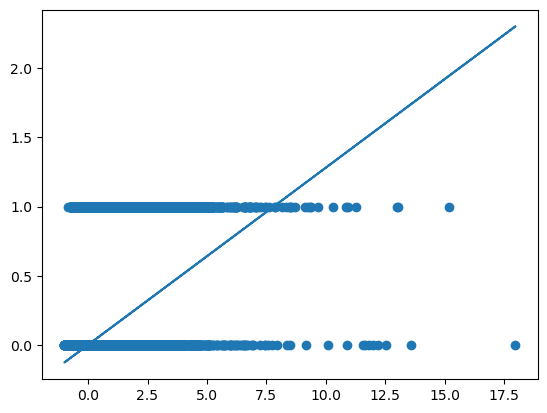

In [52]:
plt.scatter(x, target_linreg)
plt.plot(x, predictions)

# Logistic Regression

In [53]:
# inisiasi kelas LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [54]:
# mengevaluasi model 
eval_lr = evaluate_model(model_lr, x_test, y_test)
print('Logistic regression accuracy : ', eval_lr['accuracy'])

Logistic regression accuracy :  0.9085943190094683


### Menampilkan Confusion Matrix untuk Logistic Regression

In [55]:
print('Confusion matrix : \n', eval_lr['cm'])

Confusion matrix : 
 [[7081  213]
 [ 540  404]]


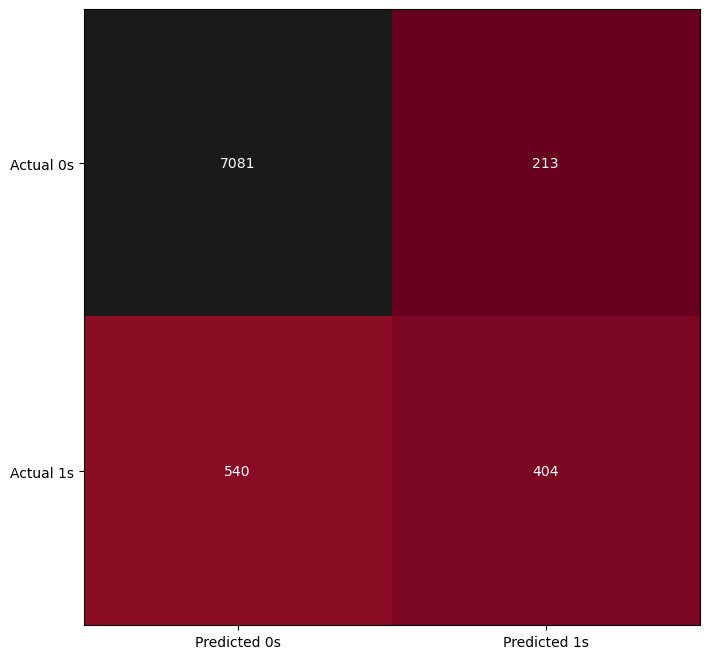

In [56]:
fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(eval_lr['cm'], cmap="RdGy")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_lr['cm'][i, j], ha='center', va='center', color='white')

plt.show()

# K-Nearest Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier

# membuat KNN Classifier 
model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:
eval_knn = evaluate_model(model_knn, x_test, y_test)
print('KNN Accuracy:', eval_knn['accuracy'])

KNN Accuracy: 0.9003398883224083


### Menampilkan Confusion Matrix untuk K-Nearest Neighbors

In [59]:
print('Confusion matrix:\n', eval_knn['cm'])

Confusion matrix:
 [[6940  354]
 [ 467  477]]


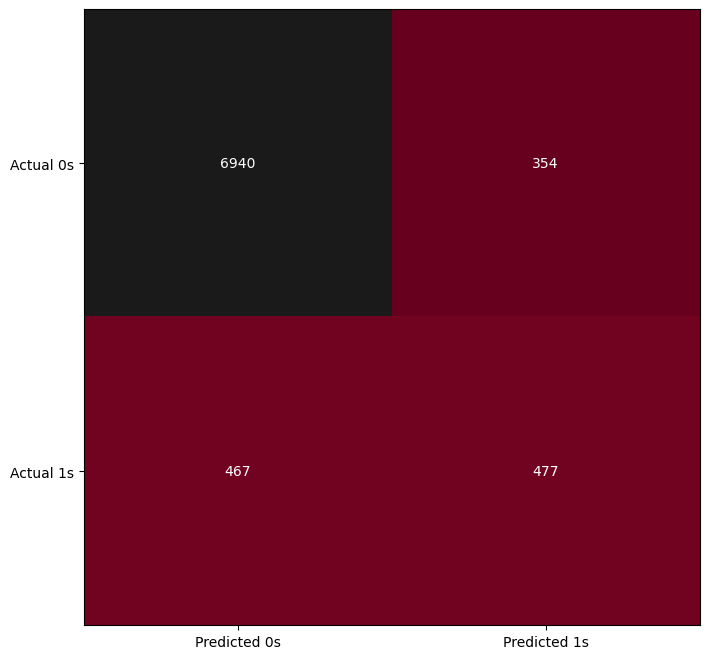

In [60]:
fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(eval_knn['cm'], cmap="RdGy")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_knn['cm'][i, j], ha='center', va='center', color='white')

plt.show()

In [61]:
y_test

,target
35577,0
13950,0
29451,1
32295,0
27477,0
...,...
8337,0
29097,1
30687,0
33048,0


### Mencari nilai K yang optimal

In [ ]:
error = []

# menghitung error ntuk nilai K antara 1-40
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test['target']))

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color='red',linestyle='dashed',marker='o', markerfacecolor='blue',markersize=12)
plt.title('Error rate K')
plt.xlabel('K')
plt.ylabel('Error Rate')

Error rate pada KNN sangat penting dalam proses pengembangan model KNN yang baik dan akurat, serta dalam memilih nilai k yang optimal untuk meminimalkan kesalahan klasifikasi atau prediksi pada data. Dari plot tersebut dapat terlihat bahwa error terkecil yang didapatkan adalah di bawah angka 0.09 yaitu pada K = 39

# Decision Tree

In [ ]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

In [ ]:
eval_dtree = evaluate_model(model_dt, x_test, y_test)
print('Decision Tree Accuracy:', eval_dtree['accuracy'])

In [ ]:
print('Confusion matrix:\n', eval_dtree['cm'])

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(eval_dtree['cm'], cmap="RdGy")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_dtree['cm'][i, j], ha='center', va='center', color='white')

plt.show()

In [ ]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

In [ ]:
!pip install six

In [ ]:
attributes_cols = attributes.columns
attributes_cols

In [ ]:
model_dt = tree.DecisionTreeClassifier(max_depth=3)
model_dt.fit(x_train, y_train)

In [ ]:
dot_data = StringIO()

tree.export_graphviz(model_dt, out_file = dot_data,
                     class_names=['0','1'], # nama target
                     feature_names=attributes_cols,
                     filled=True,
                     rounded=True,
                     special_characters=True)
                    
graph  = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

Pada visualisasi decision tree di atas, dapat dilihat bahwa nr.employeed merupakan atribut yang digunakan sebagai root node untuk mewakili seluruh dataset atau subset data yang akan diproses oleh model. nr.employeed sebagai root node merupakan variabel yang paling relevan untuk memprediksi target variable dan memiliki peran yang penting dalam menentukan arah dan alur pohon keputusan serta dalam memengaruhi kuliatas atau akurasi prediksi data.

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

In [ ]:
eval_rf = evaluate_model(model_rf, x_test, y_test)
print('RandomForest Accuracy:', eval_rf['accuracy'])

In [ ]:
print('Confusion matrix:\n', eval_dtree['cm'])

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(eval_rf['cm'], cmap="RdGy")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_rf['cm'][i, j], ha='center', va='center', color='white')

plt.show()

### Feature Importance

model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)

In [ ]:
f_i = model_rf.feature_importances_

In [ ]:
attributes.columns

In [ ]:
feature_imp = pd.Series(f_i, index=attributes.columns)

In [ ]:
feature_imp = feature_imp.sort_values(ascending=False)
feature_imp = feature_imp.head(5)
feature_imp 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
mycolor = ['#800000', '#000000', '#A52A2A', '#653700', '8C000F']

sns.barplot(x = feature_imp, y=feature_imp.index, color='maroon')

plt.title('Feature Importances of Random Forest')
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
# plt.legend(title='Feature')
plt.show()

Dari visualisasi feature importance di atas, dapat disimpulkan bahwa duration, euribr3m, dan age memiliki tingkat kepentingan yang tinggi dalam memengaruhi prediksi model sehingga fitur ini dapat dipilih menjadi fitur yang paling relevan utnuk melakukan analisis dan prediksi. Dengan menghapus fitur lain juga dapat berdampak pada peningkatan nilai accuracy.

# Naive Baiyes

In [ ]:
from sklearn.naive_bayes import GaussianNB 
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)

In [ ]:
eval_nb = evaluate_model(model_nb, x_test, y_test)
print('Naive Bayes Accuracy:', eval_nb['accuracy'])

In [ ]:
print('Confusion matrix:\n', eval_dtree['cm'])

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(eval_nb['cm'], cmap="RdGy")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_nb['cm'][i, j], ha='center', va='center', color='white')

plt.show()

## Membuat visualisasi klien yang berlangganan deposit

In [ ]:
df['target'].value_counts()

In [ ]:
df.target.value_counts()

In [ ]:
df_target = df.target
df_target = df_target.value_counts()
df_target.index = ['No', 'Yes']
my_explode = [0.18, 0]
my_colors = ['#800000', '#000000']

# print(df_target.ndim)
plt.figure(figsize=(12,9))
plt.pie(df_target, 
        labels = df_target.index, 
        startangle = 90, 
        explode=my_explode, 
        shadow=True,
        colors=my_colors,
        autopct='%.2f%%',
        textprops=dict(color=('w'))
       )
plt.title('Persentase Klien yang Berlangganan Deposit')
plt.legend()
plt.show()
# df_target.plot(kind='pie',y='total', labels=label)
# df_target

# Conclusion 

In [ ]:
print('Logistic regression accuracy :', eval_lr['accuracy'])
print('KNN Accuracy                 :', eval_knn['accuracy'])
print('Decision Tree Accuracy       :', eval_dtree['accuracy'])
print('RandomForest Accuracy        :', eval_rf['accuracy'])
print('Naive Bayes Accuracy         :', eval_nb['accuracy'])

Accuracy sangat penting untuk mengevaluasi performa suatu model dalam mengklasifikasikan data. Semakin tinggi nilai akurasi maka semakin baik algoritma tersebut. Setelah melakukan beberapa algoritma, dapat disimpulkan bahwa algoritma Random Forest merupakan pilihan terbaik karena memiliki nilai akurasi yang paling tinggi dibandingkan dengan algoritma lainnya, yaitu 0.9113862588006798.

Imputer adalah sebuah fungsi pada library Scikit-learn yang digunakan untuk mengisi nilai yang hilang pada dataset dengan nilai yang tepat. Imputer digunakan ketika kita memiliki dataset yang memiliki nilai yang hilang pada beberapa fiturnya, dan kita ingin mengisi nilai tersebut agar dataset tersebut dapat diproses oleh algoritma machine learning.

Beberapa metode yang dapat digunakan untuk mengisi nilai yang hilang pada dataset adalah:

Mean Imputation: Mengisi nilai yang hilang dengan nilai rata-rata dari seluruh nilai yang ada pada kolom tersebut.
Median Imputation: Mengisi nilai yang hilang dengan nilai tengah dari seluruh nilai yang ada pada kolom tersebut.
Mode Imputation: Mengisi nilai yang hilang dengan nilai yang paling sering muncul pada kolom tersebut.
KNN Imputation: Mengisi nilai yang hilang dengan menggunakan nilai yang mirip dari data yang sudah ada.